# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
weather_api_key = "739d2fc8780a7835d7ec6dc0ec3af3fe"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Example: Get weather data for a specific city (e.g., New York)
city = "New York"
base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Make the API request
response = requests.get(base_url).json()

# Print the response
print(response)

{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 274.25, 'feels_like': 268.36, 'temp_min': 272.23, 'temp_max': 275.35, 'pressure': 1018, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1701298047, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1701259113, 'sunset': 1701293422}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Import the OpenWeatherMap API key
weather_api_key = "739d2fc8780a7835d7ec6dc0ec3af3fe"

# Empty list to store city data
city_data = []



Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto deseado
Processing Record 2 of Set 1 | mata-utu
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | pedra azul
Processing Record 9 of Set 1 | callaway
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | sao vicente
Processing Record 16 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 17 of Set 1 | balen
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | sassandra
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | no

Processing Record 39 of Set 4 | ghat
Processing Record 40 of Set 4 | petropavlovsk-kamchatsky
Processing Record 41 of Set 4 | alo
Processing Record 42 of Set 4 | mili
Processing Record 43 of Set 4 | senador jose porfirio
Processing Record 44 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | floro
Processing Record 48 of Set 4 | piacabucu
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | qaqortoq
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | saint-louis
Processing Record 3 of Set 5 | bakanas
Processing Record 4 of Set 5 | stanley
Processing Record 5 of Set 5 | fonadhoo
City not found. Skipping...
Processing Record 6 of Set 5 | alotau
City not found. Skipping...
Processing Record 7 of Set 5 | polyarnyy
Processing Record 8 of Set 5 | kulhudhuffushi
Processing Record 9 of Set 5 | cascais
Processing Record 10 of Set 5 | palikir - national

Processing Record 31 of Set 8 | patong
Processing Record 32 of Set 8 | chernomorskoye
Processing Record 33 of Set 8 | gogrial
Processing Record 34 of Set 8 | zaragoza
Processing Record 35 of Set 8 | tubarjal
Processing Record 36 of Set 8 | estevan
Processing Record 37 of Set 8 | chernyshevskiy
Processing Record 38 of Set 8 | puerto penasco
Processing Record 39 of Set 8 | tostado
Processing Record 40 of Set 8 | rongelap
Processing Record 41 of Set 8 | dakhla
Processing Record 42 of Set 8 | santa rita
Processing Record 43 of Set 8 | veymandoo
City not found. Skipping...
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | okha
Processing Record 46 of Set 8 | belyy yar
Processing Record 47 of Set 8 | plastun
Processing Record 48 of Set 8 | howard springs
Processing Record 49 of Set 8 | taupo
Processing Record 0 of Set 9 | vernon
Processing Record 1 of Set 9 | salekhard
Processing Record 2 of Set 9 | kralendijk
Processing Record 3 of Set 9 | vadso
Processing Record 4 

Processing Record 23 of Set 12 | careiro da varzea
Processing Record 24 of Set 12 | lagunas
Processing Record 25 of Set 12 | hilo
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | stephenville
Processing Record 28 of Set 12 | brookings
Processing Record 29 of Set 12 | kerikeri
Processing Record 30 of Set 12 | jieshi
Processing Record 31 of Set 12 | kyren
Processing Record 32 of Set 12 | puttalam
Processing Record 33 of Set 12 | gbarnga
Processing Record 34 of Set 12 | quezon
Processing Record 35 of Set 12 | illizi
Processing Record 36 of Set 12 | axim
Processing Record 37 of Set 12 | markovo
Processing Record 38 of Set 12 | zaysan
Processing Record 39 of Set 12 | muana
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto deseado,-47.7503,-65.8938,288.76,55,92,6.86,AR,1701298314
1,mata-utu,-13.2816,-176.1745,301.92,78,87,8.28,WF,1701298314
2,olonkinbyen,70.9221,-8.7187,271.41,88,98,7.15,SJ,1701298314
3,bredasdorp,-34.5322,20.0403,290.25,76,76,7.12,ZA,1701298315
4,blackmans bay,-43.0167,147.3167,288.44,84,100,4.28,AU,1701298315


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto deseado,-47.7503,-65.8938,288.76,55,92,6.86,AR,1701298314
1,mata-utu,-13.2816,-176.1745,301.92,78,87,8.28,WF,1701298314
2,olonkinbyen,70.9221,-8.7187,271.41,88,98,7.15,SJ,1701298314
3,bredasdorp,-34.5322,20.0403,290.25,76,76,7.12,ZA,1701298315
4,blackmans bay,-43.0167,147.3167,288.44,84,100,4.28,AU,1701298315


In [7]:
import os

# Create the output_data directory if it doesn't exist
output_data_dir = "output_data"
os.makedirs(output_data_dir, exist_ok=True)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_data_dir, "cities.csv"), index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

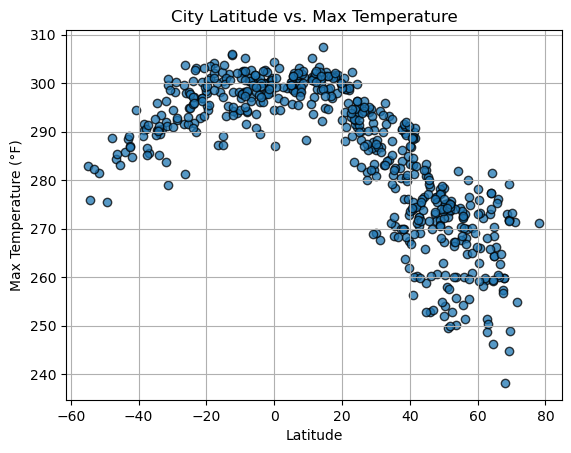

In [11]:
# Replace 'Latitude' and 'Temperature' with your actual column names
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)
plt.show()

#### Latitude Vs. Humidity

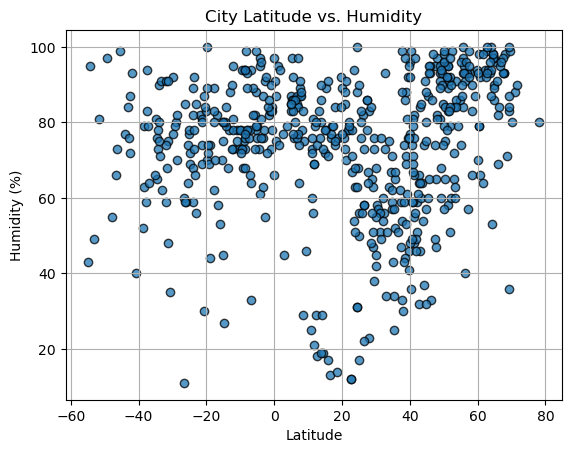

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

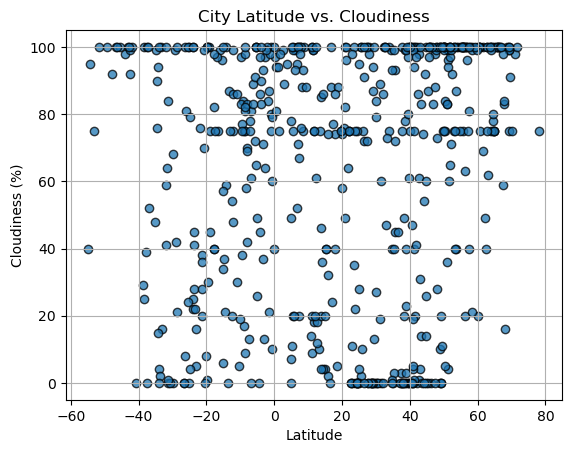

In [14]:
# Build the scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

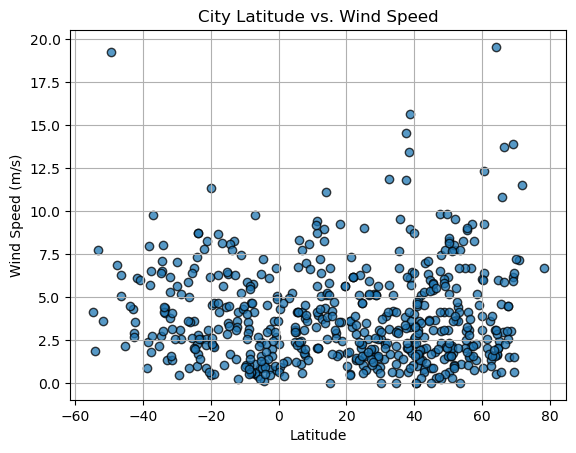

In [15]:
# Build the scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create regression line
    regression_line = slope * x_values + intercept

    # Plot scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75, label='Cities')

    # Plot regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Add labels and title
    plt.title(f"{hemisphere} Hemisphere: {title}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add annotation for the regression equation and r-value
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_value_annotation = f"R-value: {round(r_value**2, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color='red')
    plt.annotate(r_value_annotation, (min(x_values), min(y_values) + (max(y_values) - min(y_values)) * 0.1), fontsize=12, color='red')

    # Display legend
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show plot
    plt.show()

In [18]:
# Create a DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,271.41,88,98,7.15,SJ,1701298314
7,callaway,30.1530,-85.5699,286.18,45,0,0.00,US,1701298137
8,bethel,41.3712,-73.4140,274.32,55,40,3.60,US,1701298126
14,balen,51.1684,5.1717,274.12,89,96,2.12,BE,1701298316
16,sassandra,4.9500,-6.0833,298.93,87,7,2.41,CI,1701298317


In [19]:
# Create a DataFrame for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto deseado,-47.7503,-65.8938,288.76,55,92,6.86,AR,1701298314
1,mata-utu,-13.2816,-176.1745,301.92,78,87,8.28,WF,1701298314
3,bredasdorp,-34.5322,20.0403,290.25,76,76,7.12,ZA,1701298315
4,blackmans bay,-43.0167,147.3167,288.44,84,100,4.28,AU,1701298315
5,port-aux-francais,-49.3500,70.2167,275.51,97,100,19.26,TF,1701297907


###  Temperature vs. Latitude Linear Regression Plot

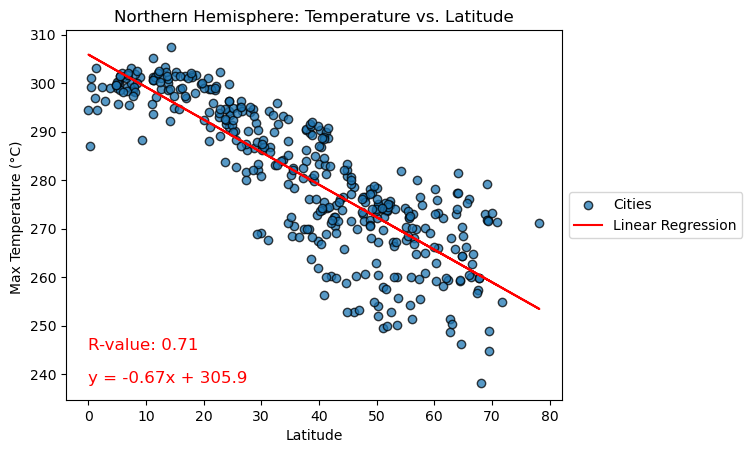

In [42]:
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'] ,"Temperature vs. Latitude" , "Latitude", "Max Temperature (°C) ", "Northern")



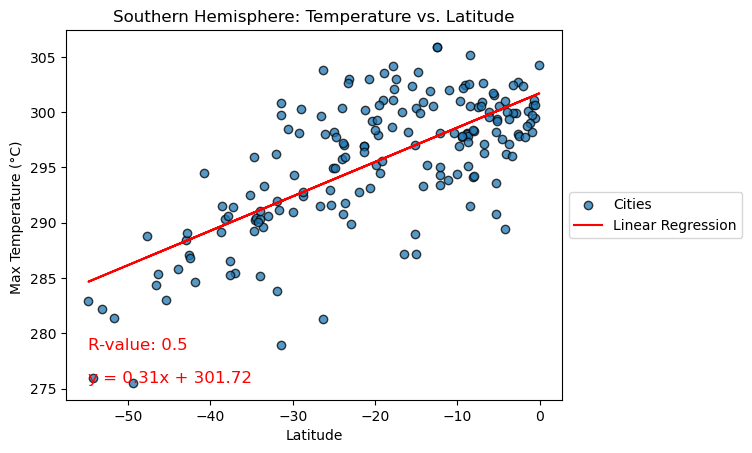

In [43]:
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'] ,"Temperature vs. Latitude" , "Latitude", "Max Temperature (°C) ", "Southern")

**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

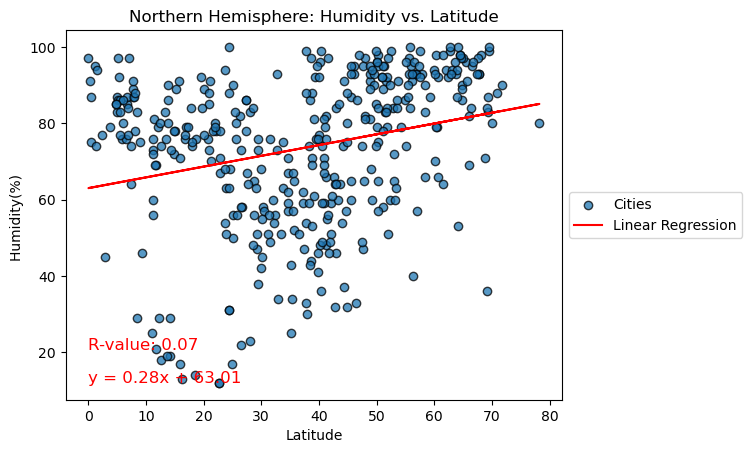

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'] ,"Humidity vs. Latitude" , "Latitude", "Humidity(%) ", "Northern")

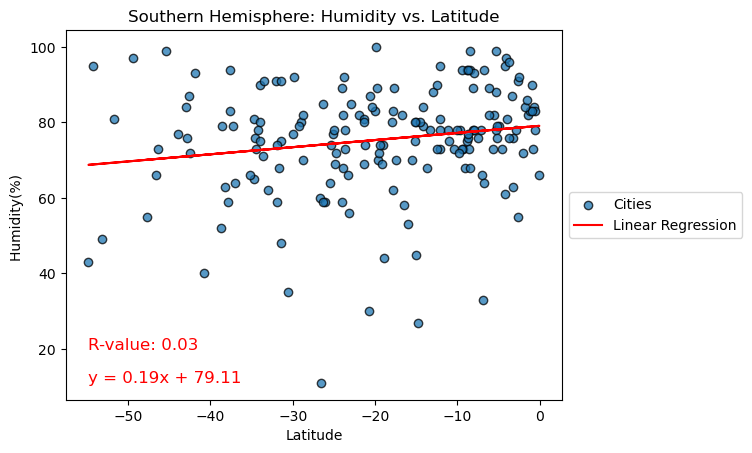

In [45]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'] ,"Humidity vs. Latitude" , "Latitude", "Humidity(%) ", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

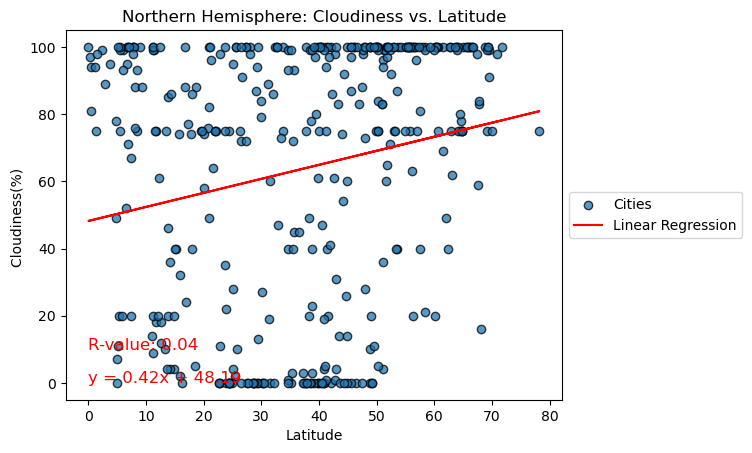

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'] ,"Cloudiness vs. Latitude" , "Latitude", "Cloudiness(%) ", "Northern")

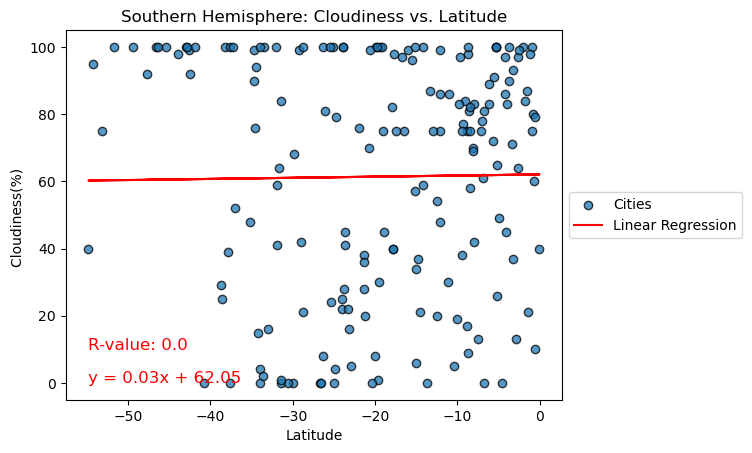

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'] ,"Cloudiness vs. Latitude" , "Latitude", "Cloudiness(%) ", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

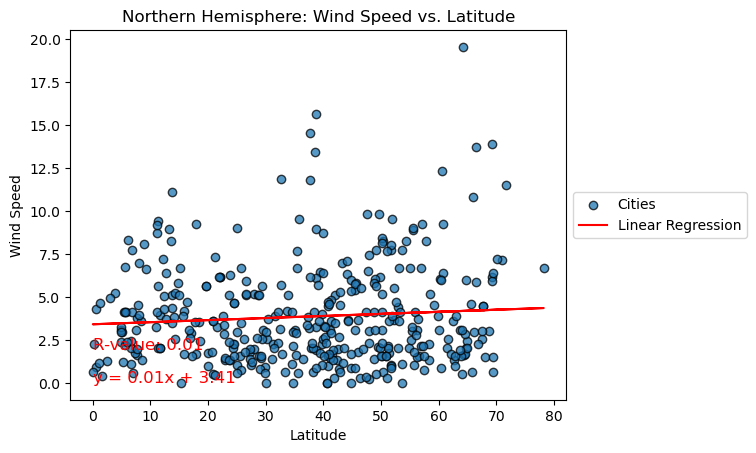

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'] ,"Wind Speed vs. Latitude" , "Latitude", "Wind Speed", "Northern")

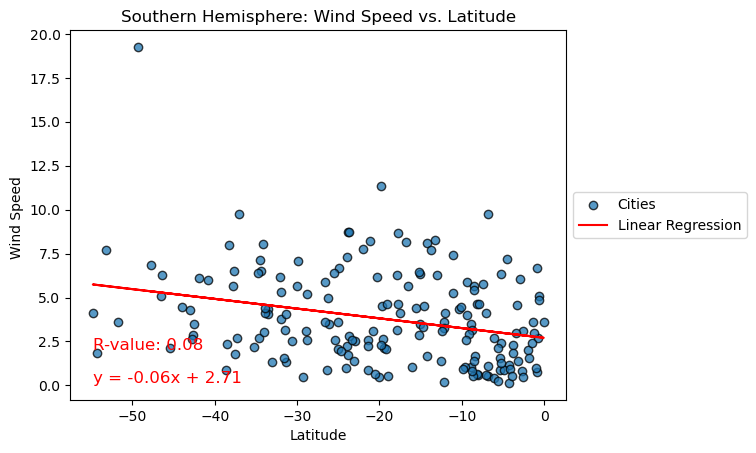

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'] ,"Wind Speed vs. Latitude" , "Latitude", "Wind Speed ", "Southern")

**Discussion about the linear relationship:** There is a low corilation for wind and latitude for both northern and southern hemisphere. This is evident by the R-value and the low slope of the linear equation.